### Install the required packages



In [ ]:
!pip install  tflite-model-maker
!pip install  pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 22.8 MB/s 
     |████████████████████████████████| 128 kB 54.6 MB/s 
     |████████████████████████████████| 1.2 MB 59.3 MB/s 
     |████████████████████████████████| 238 kB 70.2 MB/s 
     |████████████████████████████████| 87 kB 8.5 MB/s 
     |████████████████████████████████| 55.3 MB 284 bytes/s 
     |████████████████████████████████| 1.1 MB 58.4 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 3.4 MB 62.9 MB/s 
     |████████████████████████████████| 10.9 MB 74.5 MB/s 
     |████████████████████████████████| 6.4 MB 44.0 MB/s 
     |████████████████████████████████| 840 kB 39.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 352 kB 72.6 MB/s 
     |█████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import os
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
import tensorflow as tf
#assert tf.__version__.startswith('2'

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


**Step 2. Load the dataset.**




In [ ]:
#save final weights to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Paths pointing to training and validation data respectively. Images and xml annotations are in the same location
tr_image_dir= '/content/drive/MyDrive/Fruits/train'
tr_image_annotations= '/content/drive/MyDrive/Fruits/train'
val_image_dir='/content/drive/MyDrive/Fruits/valid'
test_image_dir= '/content/drive/MyDrive/Fruits/test'

label_map={1:'apple', 2:'kiwi',3:'pineapple',4:'watermelon'}
print(label_map)

# Load data. Data is loaded as tfrecord and stored in the cache_dir location, for fast future use. 
train_ds = object_detector.DataLoader.from_pascal_voc(images_dir=tr_image_dir,
                                                      annotations_dir= tr_image_dir,
                                                      label_map=label_map
                                                     )
# Load validation subset.
val_ds = object_detector.DataLoader.from_pascal_voc(images_dir=val_image_dir,
                                                      annotations_dir= val_image_dir,
                                                      label_map=label_map,
                                                     )
# Load validation subset.
test_ds = object_detector.DataLoader.from_pascal_voc(images_dir=test_image_dir,
                                                      annotations_dir= test_image_dir,
                                                      label_map=label_map,
                                                     )

print("Train dataset contains {} images".format(train_ds.__len__()))

{1: 'Apple', 2: 'kiwi', 3: 'pineapple', 4: 'watermelon'}
INFO:tensorflow:Cache will be stored in /tmp/tmp546ysb54 with prefix filename 7bee435cfee6949ada7cad38d32e815e. Cache_prefix is /tmp/tmp546ysb54/7bee435cfee6949ada7cad38d32e815e
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300
INFO:tensorflow:On image 400
INFO:tensorflow:On image 500
INFO:tensorflow:On image 600
INFO:tensorflow:Cache will be stored in /content/cache/train with prefix filename 11a526a320c4c8a1416196ba3144593c. Cache_prefix is /content/cache/train/11a526a320c4c8a1416196ba3144593c
INFO:tensorflow:On image 0
INFO:tensorflow:Cache will be stored in /content/cache/train with prefix filename fd42585a6188df7d3abc4e516ad0ebb5. Cache_prefix is /content/cache/train/fd42585a6188df7d3abc4e516ad0ebb5
INFO:tensorflow:On image 0
Train dataset contains 628 images


In [ ]:
spec = model_spec.get('efficientdet_lite0')

**Step 3. Train the TensorFlow model with the training data.**

* The EfficientDet-Lite0 model uses `epochs = 50` by default, which means it will go through the training dataset 50 times. You can look at the validation accuracy during training and stop early to avoid overfitting.
* Set `batch_size = 8` here so you will see that it takes 21 steps to go through the 175 images in the training dataset.
* Set `train_whole_model=True` to fine-tune the whole model instead of just training the head layer to improve accuracy. The trade-off is that it may take longer to train the model.

In [ ]:
model = object_detector.create(train_ds, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=val_ds,epochs = 50)

INFO:tensorflow:Retraining the models...
Epoch 1/50
 6/78 [=>............................] - ETA: 15s - det_loss: 1.8123 - cls_loss: 1.1431 - box_loss: 0.0134 - reg_l2_loss: 0.0633 - loss: 1.8756 - learning_rate: 0.0081 - gradient_norm: 1.2337WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2063s vs `on_train_batch_end` time: 0.2066s). Check your callbacks.


78/78 [==============================] - 62s 281ms/step - det_loss: 1.5222 - cls_loss: 0.9717 - box_loss: 0.0110 - reg_l2_loss: 0.0633 - loss: 1.5855 - learning_rate: 0.0090 - gradient_norm: 1.8194 - val_det_loss: 1.0941 - val_cls_loss: 0.7120 - val_box_loss: 0.0076 - val_reg_l2_loss: 0.0634 - val_loss: 1.1575
Epoch 2/50
78/78 [==============================] - 18s 232ms/step - det_loss: 1.0306 - cls_loss: 0.6567 - box_loss: 0.0075 - reg_l2_loss: 0.0634 - loss: 1.0941 - learning_rate: 0.0100 - gradient_norm: 3.1530 - val_det_loss: 1.0858 - val_cls_loss: 0.7596 - val_box_loss: 0.0065 - val_reg_l2_loss: 0.0635 - val_loss: 1.1493
Epoch 3/50
78/78 [==============================] - 20s 251ms/step - det_loss: 0.8526 - cls_loss: 0.5530 - box_loss: 0.0060 - reg_l2_loss: 0.0635 - loss: 0.9161 - learning_rate: 0.0099 - gradient_norm: 3.1647 - val_det_loss: 0.6484 - val_cls_loss: 0.4561 - val_box_loss: 0.0038 - val_reg_l2_loss: 0.0636 - val_loss: 0.7121
Epoch 4/50
78/78 [========================

**Step 5.  Export as a TensorFlow Lite model.**

Export the trained object detection model to the TensorFlow Lite format by specifying which folder you want to export the quantized model to. The default post-training quantization technique is full integer quantization.

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp5fnbd1i7/assets


INFO:tensorflow:Assets written to: /tmp/tmp5fnbd1i7/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpe2k1c0c3/labelmap.txt.


INFO:tensorflow:Saving labels in /tmp/tmpe2k1c0c3/labelmap.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.export(export_dir='/content/drive/MyDrive/Fruits/')

INFO:tensorflow:Assets written to: /tmp/tmpr27qu0wj/assets


INFO:tensorflow:Assets written to: /tmp/tmpr27qu0wj/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpn7tz1wmc/labelmap.txt.


INFO:tensorflow:Saving labels in /tmp/tmpn7tz1wmc/labelmap.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Fruits3/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Fruits3/model.tflite


**Step 6.  Evaluate the TensorFlow Lite model.**

Several factors can affect the model accuracy when exporting to TFLite:
* [Quantization](https://www.tensorflow.org/lite/performance/model_optimization) helps shrinking the model size by 4 times at the expense of some accuracy drop.
* The original TensorFlow model uses per-class [non-max supression (NMS)](https://www.coursera.org/lecture/convolutional-neural-networks/non-max-suppression-dvrjH) for post-processing, while the TFLite model uses global NMS that's much faster but less accurate.
Keras outputs maximum 100 detections while tflite outputs maximum 25 detections.

Therefore you'll have to evaluate the exported TFLite model and compare its accuracy with the original TensorFlow model.

In [ ]:
model.evaluate_tflite('model.tflite', train_ds)

628/628 [==============================] - 1438s 2s/step

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(15700, 7)
0/15700
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.85s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.639
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.943
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.756
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.712
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.251
 Average Recall     (AR) @[ IoU=0.50:

{'AP': 0.6392826,
 'AP50': 0.9426113,
 'AP75': 0.75559187,
 'AP_/Apple': 0.6223948,
 'AP_/kiwi': 0.6961708,
 'AP_/pineapple': 0.58070344,
 'AP_/watermelon': 0.6578613,
 'APl': 0.7124462,
 'APm': 0.4645041,
 'APs': 0.1594882,
 'ARl': 0.7590044,
 'ARm': 0.55046815,
 'ARmax1': 0.250962,
 'ARmax10': 0.6485194,
 'ARmax100': 0.69061816,
 'ARs': 0.24829932}

## (Optional) Test the TFLite model on your image

You can test the trained TFLite model using images from the internet.
* Replace the `INPUT_IMAGE_URL` below with your desired input image.
* Adjust the `DETECTION_THRESHOLD` to change the sensitivity of the model. A lower threshold means the model will pickup more objects but there will also be more false detection. Meanwhile, a higher threshold means the model will only pickup objects that it has confidently detected.

Although it requires some of boilerplate code to run the model in Python at this moment, integrating the model into a mobile app only requires a few lines of code.


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
pip install opencv-python==4.5.5.64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['apple', 'kiwi','pineapple','watermelon']


# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

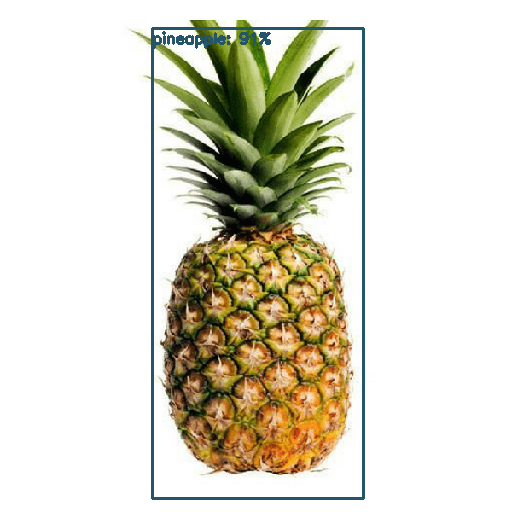

In [ ]:
#@title Run object detection and show the detection results

INPUT_IMAGE_URL = "https://pictures.grocerapps.com/original/grocerapp-pineapple--5e6d047342012.png" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)